In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt
import seaborn as sns
import operator as op
import pandas as pd
from collections import Counter

/cvmfs/cdms.opensciencegrid.org/releases/centos7/V04-00/lib/python3.7/site-packages/datacat/model.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, MutableMapping


Welcome to JupyROOT 6.22/00


In [2]:
1.6*32768

52428.8

In [3]:
base="/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged"

# series = {
#     '7hr' : '23231219_034952',
#     '6hr' : '23231219_110331'
    
# }

# lname = series
# filePath = {}

# for key in series.keys():
    
#     filePath[key] = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,series[key])
#     if(os.path.exists(filePath[key])):
#         print(key,' : ',filePath[key])
#     else:
#         print('not found: ',filePath[key])


        

series = ['23231220_190923','23231220_122140','23231220_053358','23231220_012745',
         '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
         '23231218_152721','23231218_093255','23231217_212512','23231217_171613','23231217_135018']

filePath = []

for ser in series:
    
    fp = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

23231220_190923  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_190923.root
23231220_122140  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_122140.root
23231220_053358  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_053358.root
23231220_012745  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_012745.root
23231219_184002  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231219_184002.root
23231219_110331  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231219_110331.root
23231219_034952  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Su

In [4]:
# Get trees from RQ file

# RQ=[]
# for i,key in enumerate(series.keys()):
#     RQ.append(uproot.open(filePath[key])['rqDir/zip1']) 

# eventTree=[]
# for i,key in enumerate(series.keys()):
#     eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 


dets = ['Z1','Z2','Z3']
zips = {
    'Z1' : 'zip1',
    'Z2' : 'zip2',
    'Z3' : 'zip3',
    'Z4' : 'zip4',
    'Z5' : 'zip5',
    'Z6' : 'zip6'
}
RQ = []

for idx,key in enumerate(series):
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[idx])['rqDir/%s'%(zips[det])]
    RQ.append(t)

eventTree=[]
for idx,key in enumerate(series):
    eventTree.append(uproot.open(filePath[idx])['rqDir/eventTree']) 

print('Done!')


Done!


In [6]:
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#series=['23231024_231640']
OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
OFbs={}
for i,key in enumerate(series): # for each series
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for j,det in enumerate(dets):     # for each detector
        ttc={}
        tta={}
        ttd={}
        tta0={}
        ttn = {}
        ttbs = {}
        print('Detector = ',det)
        for c in channels:                # for each channel
            
            if(det == 'Z3' and c == 'PAS1'):
                print('\tSkipping Z3-PAS1...')
                continue
            #print('\t chan = ',c)
            ttc[c]=(RQ[i][det].array(c+"OFchisq"))
            tta[c]=(RQ[i][det].array(c+"OFamps"))
            tta0[c]=(RQ[i][det].array(c+"OFamps0"))
            ttd[c]=(RQ[i][det].array(c+"OFdelay"))
            
            if(c!='PT'):
                tn[c] = (RQ[i][det].array(c+"norm"))
                ttbs[c]=(RQ[i][det].array(c+"bs"))
        tc[det] = ttc
        ta[det] = tta
        td[det] = ttd
        ta0[det] = tta0
        tn[det] = ttn
        tbs[det] = ttbs
    OFchiq[key]=tc
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFdelay[key]=td
    OFbs[key]=tbs
    OFnorms[key]=tn
    
        
    print('Done for %s..'%(key))
print('all done')

Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231220_190923..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231220_122140..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231220_053358..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231220_012745..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231219_184002..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231219_110331..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231219_034952..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231218_223530..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231218_190035..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done for 23231218_152721..
Detector =  Z1
Detector =  Z2
Detector =  Z3
	Skipping Z3-PAS1...
Done

In [7]:
#Get RQs from processed files
# chan=['PBS2']
# series=['23210325_211520','23210326_012655','23210326_130758','23210327_010110','23210327_190020','23210328_051029','23210328_142945','23210329_021134','23210329_114716']
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#series=['23231024_231640']
TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
for i,key in enumerate(series):
#     if(i!=0):
#         print('Skipping %s....'%(key))
#         continue
    TriggerTime.append(eventTree[i].array("TriggerTime"))
    TriggerType.append(eventTree[i].array("TriggerType"))
    EventNumber.append(eventTree[i].array("EventNumber"))
    TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    TriggerMask.append(eventTree[i].array("TriggerMask"))
    EventTime.append(eventTree[i].array("EventTime"))
print('Done!')

Done!


In [17]:
idx = 0
(EventTime[idx])[2000]

1703118019.0

In [16]:
chan = 'PT'
det = 'Z2'
DetNum = int(det[-1])
idx = 0
key = series[idx]
mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == 2) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
for i in range(10):
    print(i,' : ',(EventTime[idx][mask][i] - t0))

0  :  0.0
1  :  26.0
2  :  51.0
3  :  55.0
4  :  81.0
5  :  101.0
6  :  114.0
7  :  123.0
8  :  131.0
9  :  138.0


In [28]:
timestamps = {}

chan = 'PT'
for det in dets:
    t = np.array([])
    DetNum = int(det[-1]) 
    for idx, key in enumerate(series):
        mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
        t = np.append(t,EventTime[idx][mask])
    timestamps[det] = t
    print('%s done'%(det))

Z1 done
Z2 done
Z3 done


In [30]:
print('Z1 = ',len(timestamps['Z1']))
print('Z2 = ',len(timestamps['Z2']))
print('Z3 = ',len(timestamps['Z3']))

Z1 =  348488
Z2 =  172690
Z3 =  300608


In [ ]:
timestamps = {}
for idx, key in enumerate(series):
    t = {}
    for det in dets:
        DetNum = int(det[-1])
        
        
        
        
chan = 'PT'
for det in dets:
    t = np.array([])
    DetNum = int(det[-1]) 
    
        mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
        t = np.append(t,EventTime[idx][mask])
    timestamps[det] = t
    print('%s done'%(det))

In [ ]:
idx = 0
key = series[idx]


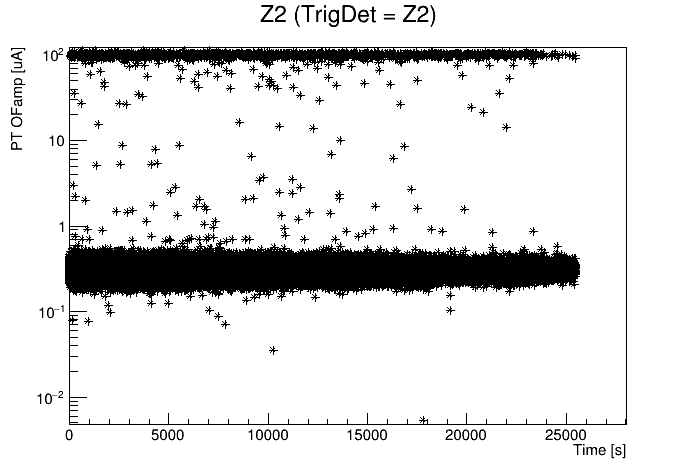

In [18]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
det = 'Z2'
DetNum = int(det[-1])
x = np.array([])
y = np.array([])

for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == 2) & (EventTime[idx] > 0.)
    t0 = EventTime[idx][mask][0]
    x = np.append(x,EventTime[idx][mask] - t0)
    y = np.append(y, OFamps[key][det][chan][mask]*1e6)

# idx = 0
# key = series[idx]
# mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
# #print(mask)
# t0 = EventTime[idx][mask][0]
# #EventTime[0][mask] - t0

# x = EventTime[idx][mask] - t0
# y = OFamps[key][det][chan][mask]*1e6

can = rt.TCanvas()
gr = rt.TGraph(len(x),x,y)
gr.SetTitle('%s (TrigDet = Z2)'%(det))
#gr_amp_t.SetTitle(det+ ' : ' +series[key]+ ' : ' +key )
gr.GetXaxis().SetTitle('Time [s]')
gr.GetYaxis().SetTitle('PT OFamp [uA]')
gr.Draw('AP*')
can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

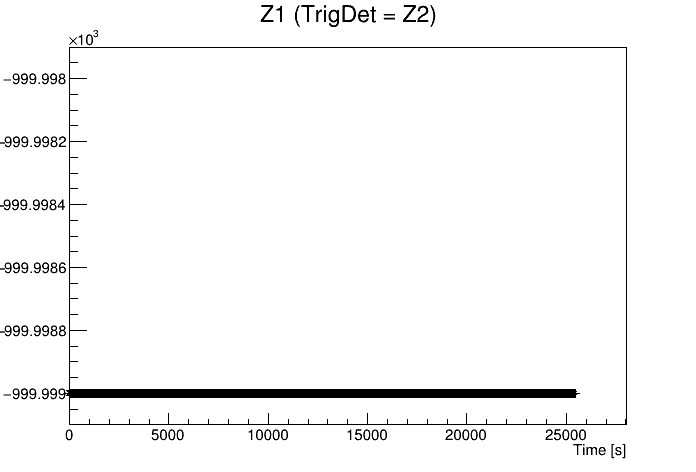

In [27]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
det = 'Z1'
DetNum = int(det[-1])
x = np.array([])
y = np.array([])

for idx, key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == 2) & (EventTime[idx] > 0.)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 2) & (EventTime[idx] > 0.)
    t0 = EventTime[idx][mask][0]
    x = np.append(x,EventTime[idx][mask] - t0)
    y = np.append(y, OFamps[key][det][chan][mask])

# idx = 0
# key = series[idx]
# mask = (TriggerType[idx] == 1) & (OFamps[series[idx]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
# #print(mask)
# t0 = EventTime[idx][mask][0]
# #EventTime[0][mask] - t0

# x = EventTime[idx][mask] - t0
# y = OFamps[key][det][chan][mask]*1e6

can = rt.TCanvas()
gr = rt.TGraph(len(x),x,y)
gr.SetTitle('%s (TrigDet = Z2)'%(det))
#gr_amp_t.SetTitle(det+ ' : ' +series[key]+ ' : ' +key )
gr.GetXaxis().SetTitle('Time [s]')
gr.GetYaxis().SetTitle('PT OFamp [uA]')
gr.Draw('AP*')
#can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

In [41]:
chan = 'PT'
det = 'Z1'
idx = 0
key = series[idx]
print('series          :\t # events with OFAmps > 0 in det %s when Z2 triggered\n'%(det))
for idx, key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 2) & (EventTime[idx] > 0.)
    #mask = ((TrigDet[idx] == 2) & (TrigDet[idx] == 1))
    mask = (TrigDet[idx] == 2) & (OFamps[key][det][chan] > 0.)
    print(key,':\t',np.sum(mask))


series          :	 # events with OFAmps > 0 in det Z1 when Z2 triggered

23231220_190923 :	 0
23231220_122140 :	 0
23231220_053358 :	 0
23231220_012745 :	 0
23231219_184002 :	 0
23231219_110331 :	 0
23231219_034952 :	 0
23231218_223530 :	 0
23231218_190035 :	 0
23231218_152721 :	 0
23231218_093255 :	 0
23231217_212512 :	 0
23231217_171613 :	 0
23231217_135018 :	 0
